In [345]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [346]:
df = pd.read_csv('train.csv')
df = df.drop(df.columns[0], axis=1)
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,Ürgüp Sivrisi
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,Ürgüp Sivrisi
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,Ürgüp Sivrisi
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,Çerçevelik
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,Ürgüp Sivrisi


# Encoding

In [347]:
class_labels = df.iloc[:, -1].astype("category").cat.codes
df.iloc[:, -1] = class_labels
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,1
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,1
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,1
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,0
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,68292,982.052,368.6867,237.1654,68891,294.8764,0.7656,0.9913,0.7212,0.8898,1.5546,0.7998,0
1996,82272,1121.769,459.4482,228.2780,82865,323.6541,0.8678,0.9928,0.7321,0.8216,2.0127,0.7044,1
1997,72049,1023.784,398.3945,230.5932,72732,302.8789,0.8155,0.9906,0.7638,0.8638,1.7277,0.7602,0
1998,73703,1065.980,422.3591,223.3923,74461,306.3357,0.8487,0.9898,0.6380,0.8151,1.8907,0.7253,0


In [348]:
import scipy.stats as stats

numeric_columns = df.select_dtypes(include=[np.number]).columns
for column in numeric_columns:
    df = df[(np.abs(stats.zscore(df[column])) < 3)]
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,84930,1204.448,508.7883,213.0266,85665,328.8407,0.9081,0.9914,0.5482,0.7357,2.3884,0.6463,1
1,103343,1275.261,521.4694,252.8941,104156,362.7401,0.8745,0.9922,0.7457,0.7985,2.0620,0.6956,1
2,98350,1269.539,526.2346,238.4702,99184,353.8688,0.8914,0.9916,0.5919,0.7668,2.2067,0.6725,1
3,69517,1059.538,429.8407,206.8250,70493,297.5093,0.8766,0.9862,0.6623,0.7782,2.0783,0.6921,0
4,80011,1182.947,501.9065,204.7531,80902,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,82145,1160.999,487.5829,215.3637,82763,323.4042,0.8972,0.9925,0.7206,0.7658,2.2640,0.6633,1
1995,68292,982.052,368.6867,237.1654,68891,294.8764,0.7656,0.9913,0.7212,0.8898,1.5546,0.7998,0
1996,82272,1121.769,459.4482,228.2780,82865,323.6541,0.8678,0.9928,0.7321,0.8216,2.0127,0.7044,1
1997,72049,1023.784,398.3945,230.5932,72732,302.8789,0.8155,0.9906,0.7638,0.8638,1.7277,0.7602,0


In [349]:
X = df.drop('Class', axis=1)
y = df['Class']

# Scale

In [350]:
def scaler(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

X_scaled = scaler(X)

# Actual Model and Fitting with Accuracy

Accuracy: 0.8831168831168831


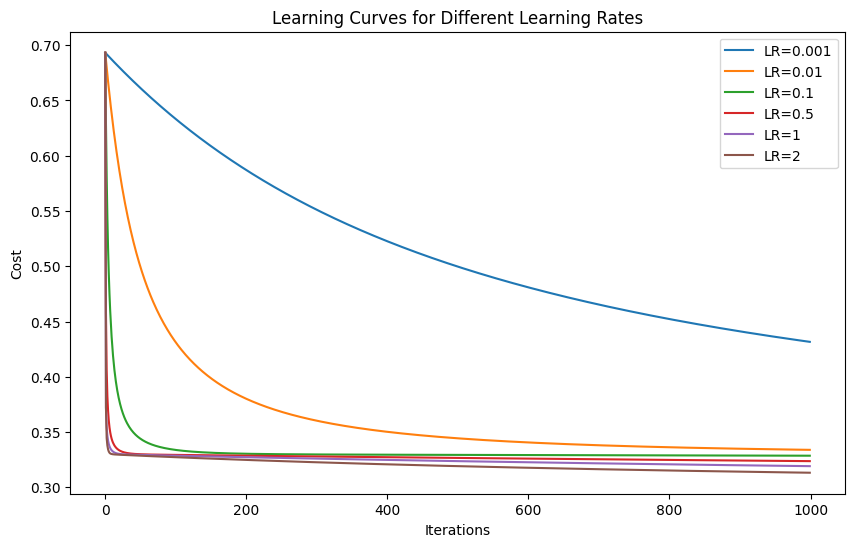

In [351]:
class LogisticRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        
        for _ in range(self.n_iterations):
            # forming linear combinations
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = self.sigmoid(linear_pred)
            
            # Calculating sare gradients
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)
            
            # Updating sare parameters
            self.weights = self.weights - self.learning_rate * dw
            self.bias = self.bias - self.learning_rate * db
    
    def predict(self, X):
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(linear_pred)
        return [1 if p > 0.5 else 0 for p in y_pred]
    
    def accuracy(self, y_true, y_pred):
        return np.sum(y_true == y_pred) / len(y_true)
    

y_numeric = y.astype('int')

model = LogisticRegression(learning_rate=2, n_iterations=10000)
model.fit(X_scaled, y_numeric)

predictions = model.predict(X_scaled)

accuracy = model.accuracy(y, predictions)
print(f"Accuracy: {accuracy}")


#figuring out if i am actually getting better results with lr = 2 ???
def plot_learning_curves(X, y, learning_rates=[0.001, 0.01, 0.1, 0.5, 1, 2]):
    plt.figure(figsize=(10, 6))
    for lr in learning_rates:
        costs = []
        model = LogisticRegression(learning_rate=lr, n_iterations=1000)
        
        n_samples, n_features = X.shape
        model.weights = np.zeros(n_features)
        model.bias = 0
        
        for _ in range(model.n_iterations):
            linear_pred = np.dot(X, model.weights) + model.bias
            predictions = model.sigmoid(linear_pred)
            
            cost = -np.mean(y * np.log(predictions + 1e-15) + 
                          (1-y) * np.log(1 - predictions + 1e-15))
            costs.append(cost)
            
            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)
            
            model.weights = model.weights - model.learning_rate * dw
            model.bias = model.bias - model.learning_rate * db
            
        plt.plot(costs, label=f'LR={lr}')
    
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Learning Curves for Different Learning Rates')
    plt.legend()
    plt.show()

plot_learning_curves(X_scaled, y_numeric)